In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

data_df = pd.read_csv('Data Carrard et al. 2022 MedTeach.csv').drop(columns='id')
data_describe = pd.read_csv('Codebook Carrard et al. 2022 MedTeach.csv', sep=';')
newnames = ["depression", "anxiety", "exhaustion", "cynicism", "efficacy"]
data_df.columns = list(data_df.columns[:14]) + newnames + list(data_df.columns[19:])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, fbeta_score


data_df['target'] = data_df['depression'].apply(lambda x: 1 if x >= 16 else 0)

X = data_df.drop(['depression', 'glang', 'target'], axis=1)
y = data_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model_no_outliers = GaussianNB()
model_no_outliers.fit(X_train, y_train)

y_pred_no_outliers = model_no_outliers.predict(X_test)

f1_score = fbeta_score(y_test, y_pred_no_outliers, beta=1)
f2_score = fbeta_score(y_test, y_pred_no_outliers, beta=2)


In [39]:
print(f"f1_score : {f1_score}")
print(f"f2_score : {f2_score}")

f1_score : 0.823943661971831
f2_score : 0.834522111269615


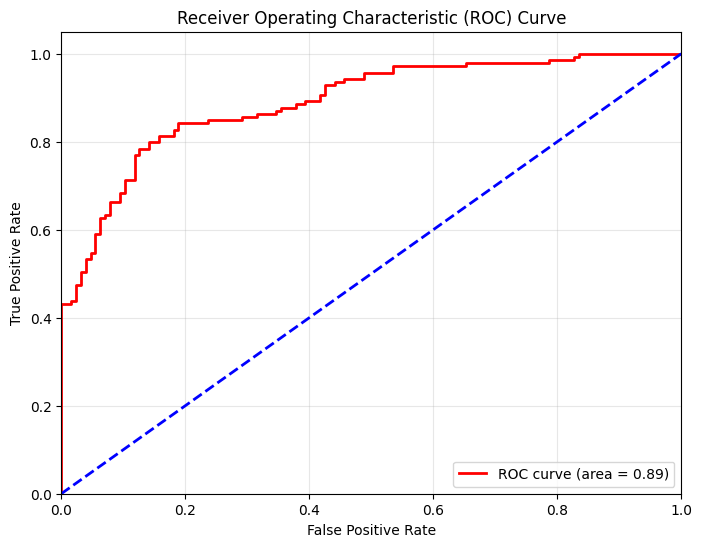

In [40]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model_no_outliers.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='r', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [41]:
excluded_features = ['depression', 'target', 'anxiety', 'exhaustion', 'cynicism', 'efficacy']

X_excluded_emotions = data_df.drop(excluded_features, axis=1)
X = X_excluded_emotions.drop('glang', axis=1)

X_train_excluded_emotions, X_test_excluded_emotions, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

model_excluded_emotions = GaussianNB()
model_excluded_emotions.fit(X_train_excluded_emotions, y_train)

y_pred_excluded_emotions = model_excluded_emotions.predict(X_test_excluded_emotions)

f1_score_excluded_emotions = fbeta_score(y_test, y_pred_excluded_emotions, beta=1)
f2_score_excluded_emotions = fbeta_score(y_test, y_pred_excluded_emotions, beta=2)


In [42]:
print(f"f1_score : {f1_score_excluded_emotions}")
print(f"f2_score : {f2_score_excluded_emotions}")

f1_score : 0.7152777777777777
f2_score : 0.7304964539007092


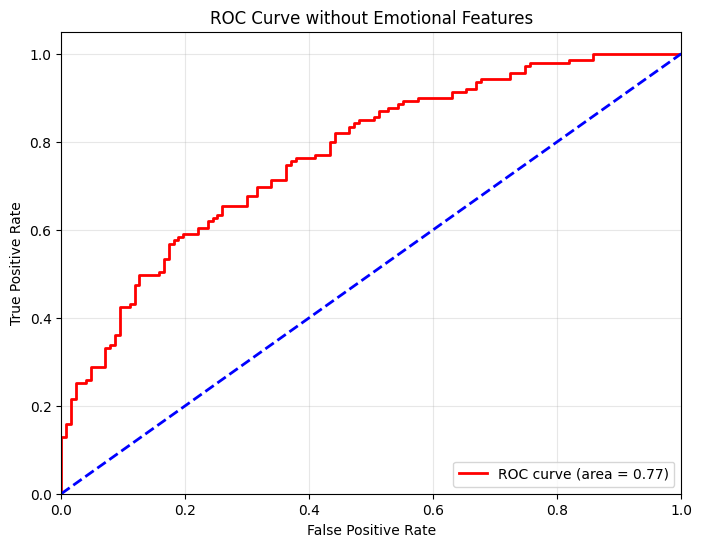

In [44]:
fpr_excluded_emotions, tpr_excluded_emotions, _ = roc_curve(
    y_test, model_excluded_emotions.predict_proba(X_test_excluded_emotions)[:, 1])
roc_auc_excluded_emotions = auc(fpr_excluded_emotions, tpr_excluded_emotions)

plt.figure(figsize=(8, 6))
plt.plot(fpr_excluded_emotions, tpr_excluded_emotions, color='r', lw=2, 
         label=f'ROC curve (area = {roc_auc_excluded_emotions:.2f})')
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve without Emotional Features')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
